## ロジスティック関数

In [48]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [49]:
x = np.linspace(-5, 5, 100)
y = 1 / (1 + np.exp(-x))

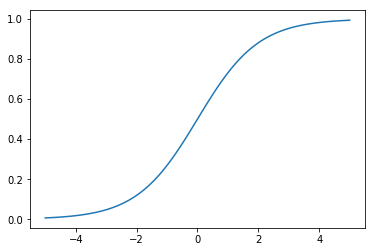

In [50]:
plt.plot(x, y)
plt.show()

## デモンストレーション (線形分離可能な場合)

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

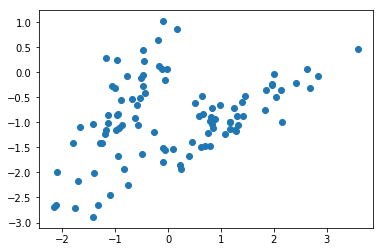

In [62]:
# デモ用のデータセットを作成
X, y = make_classification(n_features=2, n_samples=100, n_redundant=0, n_informative=2, random_state=5, n_clusters_per_class=1, n_classes=2)
plt.scatter(X[:,0], X[:,1])

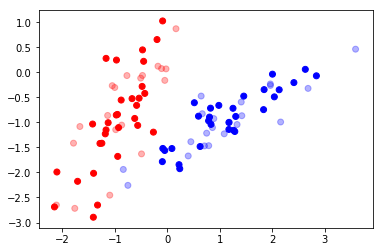

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # 訓練用とテスト用に分割
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright) # 訓練用は濃くプロット
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3) # テスト用は薄くプロット

In [64]:
model = LogisticRegression(random_state=0, penalty='elasticnet', C=1, solver='saga', l1_ratio=0)
model.fit(X_train, y_train) # 学習
score = model.score(X_test, y_test)
print(f"score: {score}")

score: 0.95


### 決定境界を見てみよう

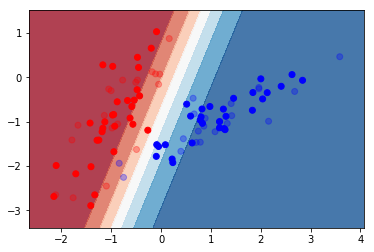

In [65]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02)) # データの範囲で格子状の点群を作成

Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] # 格子データに対して確率値を予測
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8) # 格子状データ
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright) # トレーニング用データ
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3) # テスト用データ

## デモンストレーション (線形分離不可能な場合)

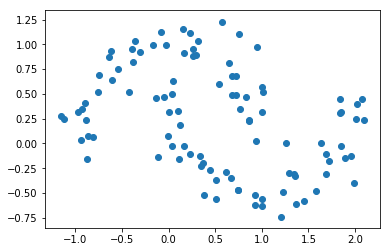

In [57]:
X, y = make_moons(noise=0.15, random_state=0)
X = np.c_[X, X[:, 0]**2, X[:, 0]**3] # x軸方向の特徴量に対して2次の項と3次の項を追加
plt.scatter(X[:,0], X[:,1])

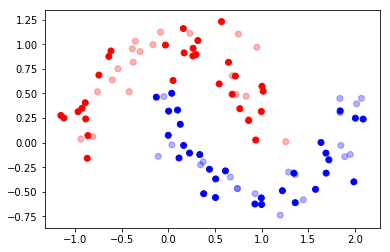

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # 訓練用とテスト用に分割

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright) # 訓練用は濃くプロット
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3) # テスト用は薄くプロット

In [59]:
model = LogisticRegression(random_state=0, penalty='l2', C=10, solver='liblinear')
model.fit(X_train, y_train) # 学習
score = model.score(X_test, y_test)
print(f"score: {score}")

score: 0.975


### 決定境界を見てみよう

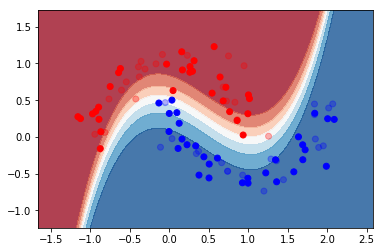

In [60]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02)) # データの範囲で格子状の点群を作成

Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, xx.ravel()**3])[:, 1] # 格子データに対して確率値を予測
#Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] # 格子データに対して確率値を予測
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8) # 格子状データ
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright) # トレーニング用データ
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3) # テスト用データ